importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection and Analysis

In [2]:
#loading the data
customer_data=pd.read_csv("customer_segmentation_data.csv")

In [4]:
#first 5 rows
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,68,123,80
1,2,Female,57,40,50
2,3,Male,24,26,12
3,4,Male,49,91,95
4,5,Male,65,100,57


In [5]:
#finding the no of rows and column
customer_data.shape

(10000, 5)

In [6]:
#getting some info about data set
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              10000 non-null  int64 
 1   Gender                  10000 non-null  object
 2   Age                     10000 non-null  int64 
 3   Annual Income (k$)      10000 non-null  int64 
 4   Spending Score (1-100)  10000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 390.8+ KB


In [7]:
#checking missing value
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Choosing the Annual income column and Spending score column

In [8]:
x=customer_data.iloc[:,[3,4]].values

In [9]:
print(x)

[[123  80]
 [ 40  50]
 [ 26  12]
 ...
 [129 100]
 [ 47  45]
 [132  17]]


Choose the no of Clustors

WCSS -> Within Clustors Sum of Squares

In [10]:
# finding wcss value for diffrent number of Clustors

wcss=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)

  wcss.append(kmeans.inertia_)

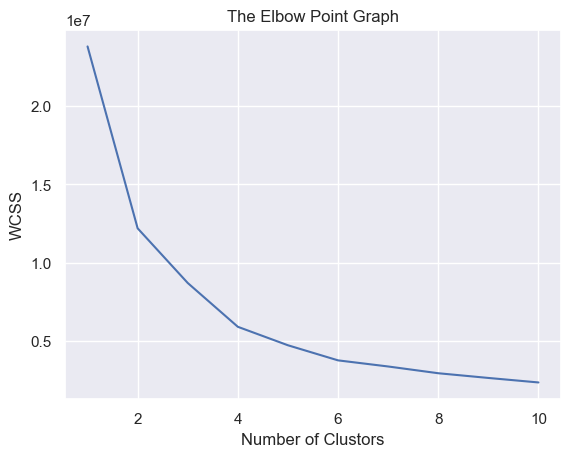

In [11]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clustors')
plt.ylabel('WCSS')
plt.show()

Optimum number of clustors=5

Training the k-means Clustoring model

In [12]:
kmeans= KMeans(n_clusters=5,init='k-means++',random_state=0)

#return a label for each data point based on their clustor
Y=kmeans.fit_predict(x)
print(Y)

[2 1 3 ... 2 3 0]


5 Clustors = 0,1,2,3,4

Visualizing all the Clustors

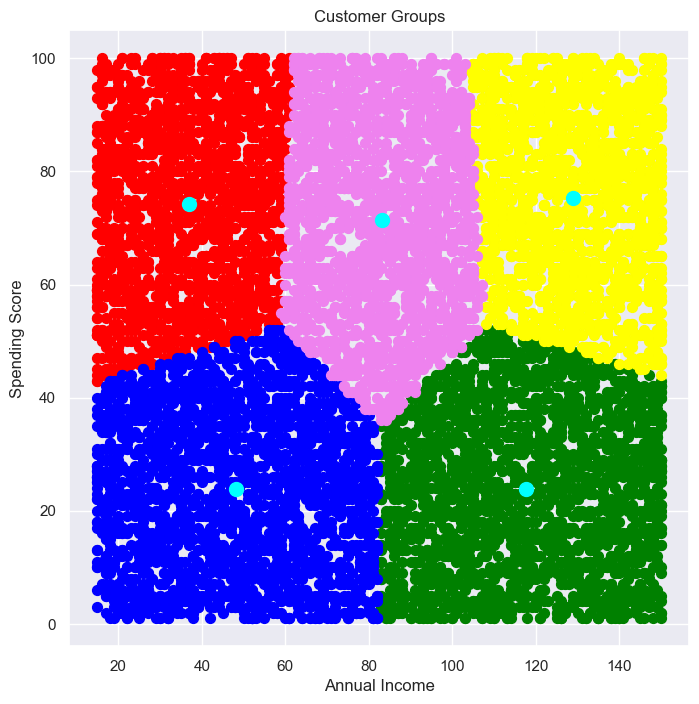

In [13]:
#plotting all the clustorsand their centroids

plt.figure(figsize=(8,8))
plt.scatter(x[Y==0,0],x[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(x[Y==1,0],x[Y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(x[Y==2,0],x[Y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(x[Y==3,0],x[Y==3,1],s=50,c='blue',label='Cluster 4')
plt.scatter(x[Y==4,0],x[Y==4,1],s=50,c='violet',label='Cluster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()